<a href="https://colab.research.google.com/github/Shakilgithub20/Basic-Computer-Vision/blob/main/Mega_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [ ]:
!pip install MiniSom

## Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


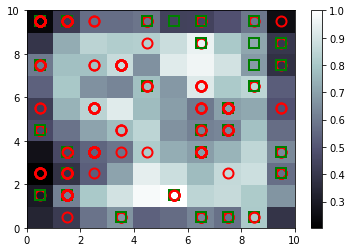

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15644446
15803378
15714087
15730793
15775750
15788776
15765257
15654859
15723827
15767231
15746995
15762716
15706464
15725028
15768474
15764444
15762045
15731989
15671534
15721569
15799859
15771409
15777893
15674750
15667460
15684512
15805212
15691150
15785339
15740458
15807546
15773869
15796111
15809800
15802071
15790630
15750055
15748499
15803682
15770406
15732943
15770255
15773789
15794868
15762392
15812470
15674583


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [ ]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 921us/step - loss: 1.0211 - accuracy: 0.4449
Epoch 2/10
690/690 [==============================] - 1s 943us/step - loss: 0.5365 - accuracy: 0.8536
Epoch 3/10
690/690 [==============================] - 1s 920us/step - loss: 0.3965 - accuracy: 0.9232
Epoch 4/10
690/690 [==============================] - 1s 911us/step - loss: 0.3335 - accuracy: 0.9290
Epoch 5/10
690/690 [==============================] - 1s 924us/step - loss: 0.2987 - accuracy: 0.9304
Epoch 6/10
690/690 [==============================] - 1s 908us/step - loss: 0.2786 - accuracy: 0.9304
Epoch 7/10
690/690 [==============================] - 1s 945us/step - loss: 0.2662 - accuracy: 0.9304
Epoch 8/10
690/690 [==============================] - 1s 920us/step - loss: 0.2581 - accuracy: 0.9304
Epoch 9/10
690/690 [==============================] - 1s 904us/step - loss: 0.2509 - accuracy: 0.9304
Epoch 10/10
690/690 [==============================] - 1s 908us/step - loss: 0.240

## Predicting test set results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [ ]:
print(y_pred)